In [1]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import math

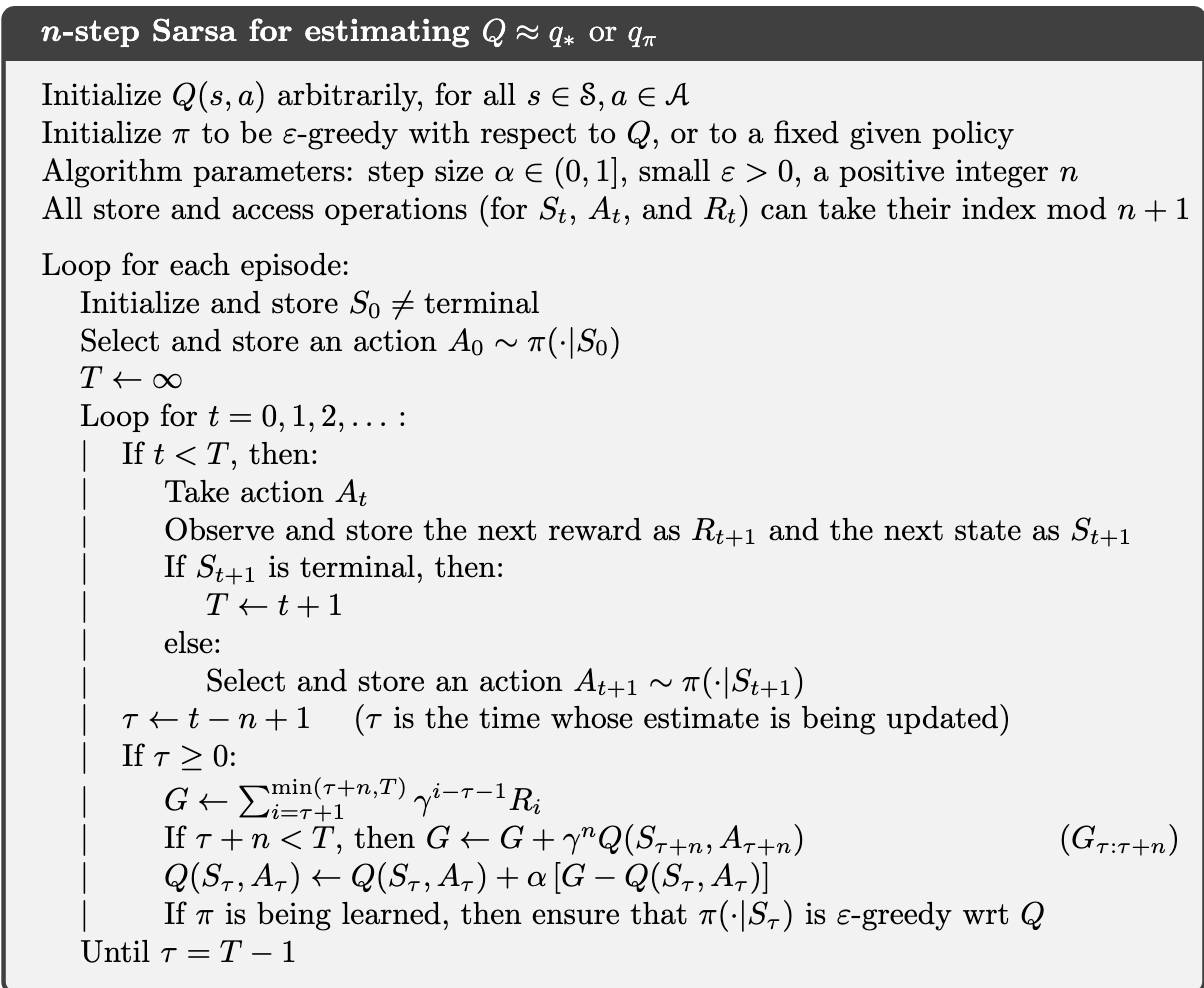

In [ ]:
def n_step_Sarsa(env, n, epsilon=0.1, step_size=0.5, discount_factor=0.99, episodes=10000):
    nS = env.observation_space.n
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    
    for i in range(episodes):
        state, _ = env.reset()
        T = math.inf
        t = 0

        rewards = [0.0] * (n + 1)
        states = [0] * (n + 1)
        actions = [0] * (n + 1)
        states[0] = state
        #eps greedy
        greedy = np.flatnonzero(Q[state] == Q[state].max())
        probs = np.full(nA, epsilon/nA)
        probs[greedy] += (1.0-epsilon) / len(greedy)
        action = np.random.choice(nA, p=probs)
        actions[0] = action
        while(True):
            if t < T:
                actions[t % (n + 1)] = action

                s_next, reward, term, trun, _ = env.step(action)
                states[(t + 1) % (n + 1)] = s_next #store S(t+1)
                rewards[(t + 1) % (n + 1)] = reward #store R(t+1)
                state = s_next
                if term or trun:
                    T = t + 1
                else:
                    #eps greedy for next state
                    greedy = np.flatnonzero(Q[state] == Q[state].max())
                    probs = np.full(nA, epsilon/nA)
                    probs[greedy] += (1.0-epsilon) / len(greedy)
                    action = np.random.choice(nA, p=probs)
                    actions[(t + 1) % (n + 1)] = action #store A(t+1)
            tau = t - n + 1
            if tau >= 0:
                upper = min(tau + n, T) #this is for if the episode terminates in the middle of the sliding window
                G = 0.0
                for k in range(tau + 1, upper + 1): #include the last one
                    G += (discount_factor ** (k - tau - 1)) * rewards[k % (n + 1)]
                if tau+n < T: #if episode terminates in sliding window, we cant bootstrap since we cant bootstrap with a terminal state
                    G += (discount_factor ** n) * Q[states[(tau + n) % (n + 1)]][actions[(tau + n) % (n + 1)]]
                Q[states[tau % (n + 1)]][actions[tau % (n + 1)]] += step_size * (G - Q[states[tau % (n + 1)]][actions[tau % (n + 1)]])
            t+=1
            if tau == T - 1:
                break
    return Q

        